##Importing Libraries

In [27]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os.path as op


In [24]:
node=['150']
mon=['Mar']
for j in node:
  for i in mon:
    inp_df= pd.read_excel('/content/drive/My Drive/Project/data_gkv/AT510_Node_'+str(j)+'_'+str(i)+'19_OutputFile.xlsx')
    print(inp_df.head(20))


    ID  Node    Date   Time  Sseq#  ...  COppb_PR  Day  Month  Year     DecDay
0   FD   150  190327  62253      5  ...      2907   27      3    19  26.265891
1   FD   150  190327  62353      6  ...      1379   27      3    19  26.266586
2   FD   150  190327  90442      4  ...     14613   27      3    19  26.378264
3   FD   150  190327  90542      5  ...      2420   27      3    19  26.378958
4   FD   150  190327  90642      6  ...      1438   27      3    19  26.379653
5   FD   150  190327  90742      7  ...      1148   27      3    19  26.380347
6   FD   150  190327  90842      8  ...      1148   27      3    19  26.381042
7   FD   150  190327  90942      9  ...       936   27      3    19  26.381736
8   FD   150  190327  91042     10  ...       942   27      3    19  26.382431
9   FD   150  190327  91142     11  ...       922   27      3    19  26.383125
10  FD   150  190327  91242     12  ...       811   27      3    19  26.383819
11  FD   150  190327  91342     13  ...       743   

##Data Fetching from Excel file

In [3]:
A1=np.empty((0,5))
U1=np.empty((0,7))
node=['150','149',]
mon=['Mar','Apr']
for j in node:
  for i in mon:
    inp= pd.read_excel('/content/drive/My Drive/Project/data_gkv/AT510_Node_'+str(j)+'_'+str(i)+'19_OutputFile.xlsx',usecols=[1,2,3,15,16])
    out= pd.read_excel('/content/drive/My Drive/Project/data_gkv/AT510_Node_'+str(j)+'_'+str(i)+'19_OutputFile.xlsx',usecols=[5,6,7,8,17,18,19])
    
    inp=np.array(inp)
    out=np.array(out)
    
    A1=np.append(A1, inp, axis=0)
    U1=np.append(U1, out, axis=0)

print(A1)
print(U1)


[[1.50000e+02 1.90327e+05 6.22530e+04 3.03200e+01 5.46700e+01]
 [1.50000e+02 1.90327e+05 6.23530e+04 3.03200e+01 5.43900e+01]
 [1.50000e+02 1.90327e+05 9.04420e+04 3.27300e+01 6.27800e+01]
 ...
 [1.49000e+02 1.90430e+05 1.23000e+05 3.16100e+01 6.19000e+01]
 [1.49000e+02 1.90430e+05 1.23100e+05 3.16100e+01 6.22700e+01]
 [1.49000e+02 1.90430e+05 1.23200e+05 3.16000e+01 6.22100e+01]]
[[ 16.     5.   -18.   ...   3.74   4.36   4.38]
 [ 12.     2.   -49.   ...   3.01   3.62   3.65]
 [123.    55.   132.   ...  10.96  14.16  15.52]
 ...
 [ 55.    17.   -57.   ...   5.52   7.23  16.29]
 [ 58.    21.   -58.   ...   6.29   7.65   7.92]
 [ 59.    23.   -57.   ...   6.38   7.89   8.09]]


##XGboost Regression Model

In [28]:
from sklearn.preprocessing import MinMaxScaler
import warnings
scaler_obj=MinMaxScaler()
X1=scaler_obj.fit_transform(A1)
Y1=scaler_obj.fit_transform(U1)

warnings.filterwarnings(action='ignore', category=UserWarning)

# Splitting Data into training and testing dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.2,random_state=42)

from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor

#creating object of sgboostregressor
model1=MultiOutputRegressor(XGBRegressor(objective ='reg:squarederror',max_depth=8,cosample_bytree=.5,learning_rate=.1,min_child_weight=3,
                   n_estimators=200,subsample=.7))
#training the model
model_fit1=model1.fit(x_train,y_train)
print("Model training is Done!!")


Model training is Done!!


 ##Finding Out R^2 Score on XGBRegression Model

r2 score on train data 0.9426134014720243
r2 score on test data 0.8623226304872951
 

Y_Test: [[0.83321352 0.47020377 0.36282353 ... 0.00947242 0.00604374 0.00577713]
 [0.84399712 0.4698193  0.38682353 ... 0.01225085 0.00741732 0.01820147]
 [0.8612509  0.46212995 0.35905882 ... 0.02480208 0.01547175 0.01487246]
 ...
 [0.85621855 0.47289504 0.36611765 ... 0.00364736 0.00230878 0.0022914 ]
 [0.86268871 0.46597463 0.368      ... 0.02466262 0.01609132 0.01656939]
 [0.83393242 0.4709727  0.34305882 ... 0.00878586 0.00534819 0.00692823]]
Y_Test_Predict: [[0.8358072  0.46971342 0.36235344 ... 0.01546791 0.00907588 0.01084411]
 [0.83622706 0.46684238 0.39018792 ... 0.01173508 0.00774854 0.00859064]
 [0.8613768  0.4627241  0.3586766  ... 0.02644098 0.01644659 0.01661077]
 ...
 [0.85550195 0.47132188 0.36633193 ... 0.00380644 0.00232175 0.00316933]
 [0.8655609  0.46606508 0.3674847  ... 0.01763761 0.01199895 0.01354396]
 [0.8328502  0.47040194 0.34450817 ... 0.00734317 0.00435343 0.00483993]]


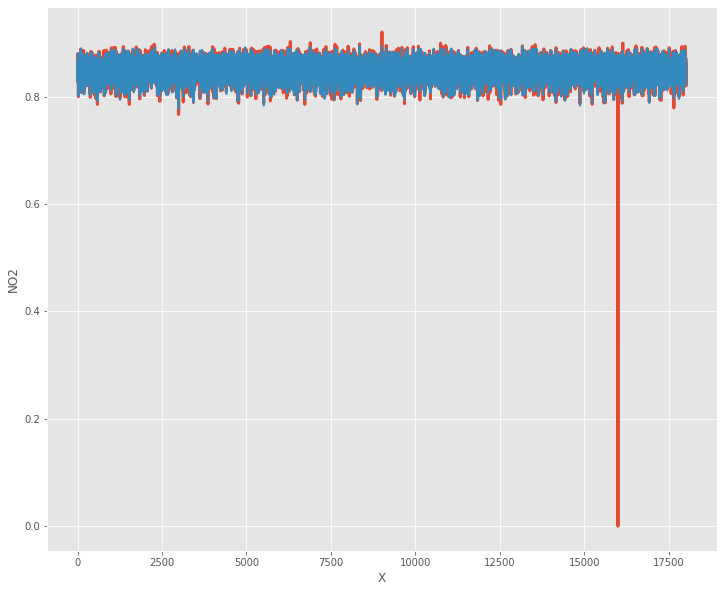

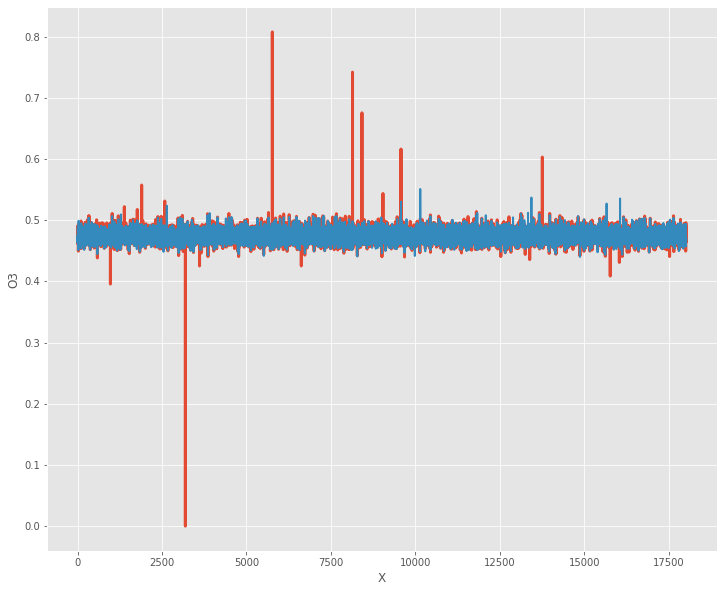

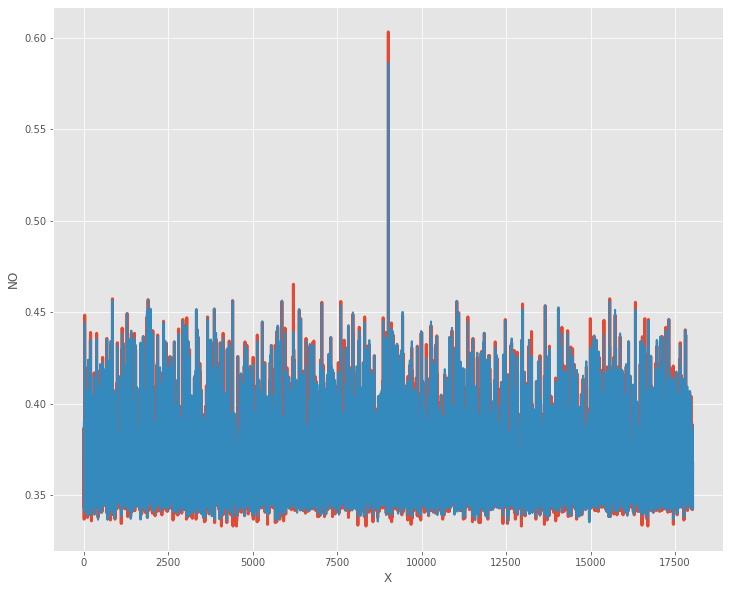

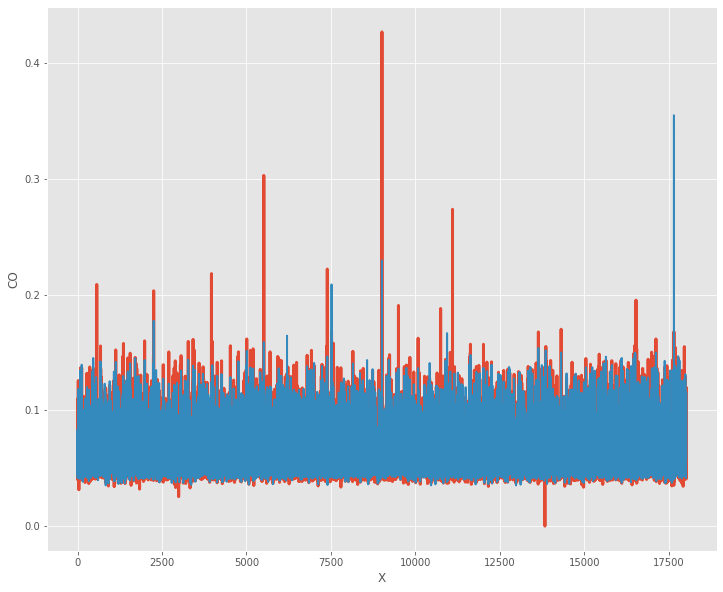

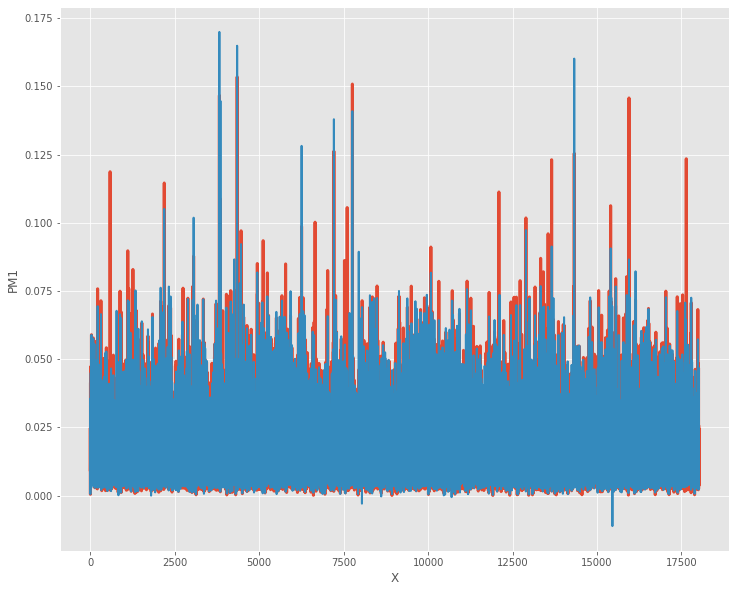

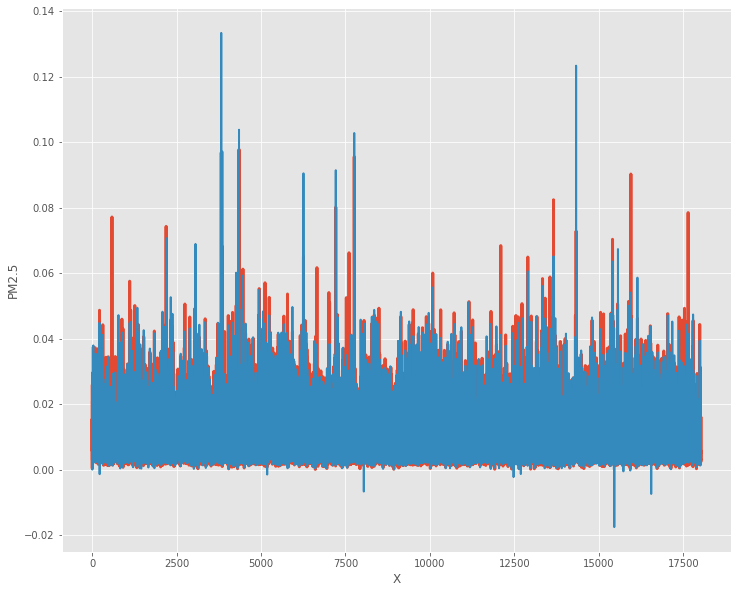

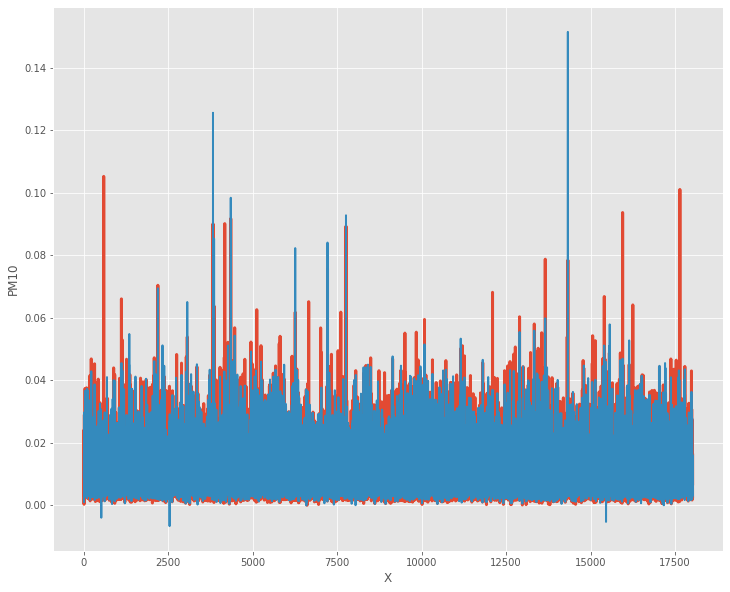

In [30]:
from sklearn.metrics import r2_score

train_sizes=['NO2','O3','NO','CO','PM1','PM2.5','PM10']

#finding out the r2 score
y_train_pred1=model1.predict(x_train)
r2_train1=r2_score(y_train,y_train_pred1)

y_test_pred1=model1.predict(x_test)
r2_test1=r2_score(y_test,y_test_pred1)

print('r2 score on train data '+str(r2_train1))
print('r2 score on test data '+ str(r2_test1))
print(' \n')
# printing y_test and y_test_predict
print("Y_Test:",y_test)
print("Y_Test_Predict:",y_test_pred1)

from matplotlib import style

style.use('ggplot')

for i in range(0,7):
  plt.figure(figsize=[12,10])
  plt.plot(y_test[:,i],linewidth=3, markersize=12)
  plt.plot(y_test_pred1[:,i],linewidth=2, markersize=12)
  plt.xlabel('X')
  plt.ylabel(train_sizes[i])
  plt.show()

MSE,MAE and RMSE Values for XGBoost Regressor

In [31]:
from sklearn import metrics
from statsmodels.tools.eval_measures import aic
xgboost_mae=metrics.mean_absolute_error(y_test, y_test_pred1)
xgboost_mse=metrics.mean_squared_error(y_test, y_test_pred1)
xgboost_rmse=np.sqrt(xgboost_mse)
print('Mean Absolute Error:',xgboost_mae)
print('Mean Squared Error:',xgboost_mse )
print('Root Mean Squared Error:',xgboost_rmse)

Mean Absolute Error: 0.001955862053424563
Mean Squared Error: 2.285973898022485e-05
Root Mean Squared Error: 0.00478118593867932


##RandomForest Regressor Model

In [33]:
from sklearn.preprocessing import MinMaxScaler
import warnings
scaler_obj=MinMaxScaler()
X1=scaler_obj.fit_transform(A1)
Y1=scaler_obj.fit_transform(U1)

warnings.filterwarnings(action='ignore', category=UserWarning)

# Splitting Data into training and testing dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.2,random_state=42)

from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

model2=MultiOutputRegressor(RandomForestRegressor(max_depth=8,n_estimators=200))

#training the model
model_fit2=model2.fit(x_train,y_train)
print("Model training is Done!!")


Model training is Done!!


##R^2 Score on RandomForestRegressor

r2 score on train data 0.723891786094261
r2 score on test data 0.7161883897443564
Y_Test: [[0.83321352 0.47020377 0.36282353 ... 0.00947242 0.00604374 0.00577713]
 [0.84399712 0.4698193  0.38682353 ... 0.01225085 0.00741732 0.01820147]
 [0.8612509  0.46212995 0.35905882 ... 0.02480208 0.01547175 0.01487246]
 ...
 [0.85621855 0.47289504 0.36611765 ... 0.00364736 0.00230878 0.0022914 ]
 [0.86268871 0.46597463 0.368      ... 0.02466262 0.01609132 0.01656939]
 [0.83393242 0.4709727  0.34305882 ... 0.00878586 0.00534819 0.00692823]]
Y_Test_Predict: [[0.84374582 0.46982595 0.36111875 ... 0.01126805 0.00977636 0.01169386]
 [0.82244121 0.46225846 0.40203137 ... 0.01380379 0.00867596 0.00931577]
 [0.86086971 0.46402101 0.35415176 ... 0.03073584 0.01970962 0.0194037 ]
 ...
 [0.84480671 0.47791742 0.36251021 ... 0.00345895 0.00248261 0.00345361]
 [0.86519572 0.46645748 0.35145176 ... 0.01429682 0.0092262  0.01108026]
 [0.83326782 0.46984404 0.34730733 ... 0.00833263 0.00512796 0.00587718]]


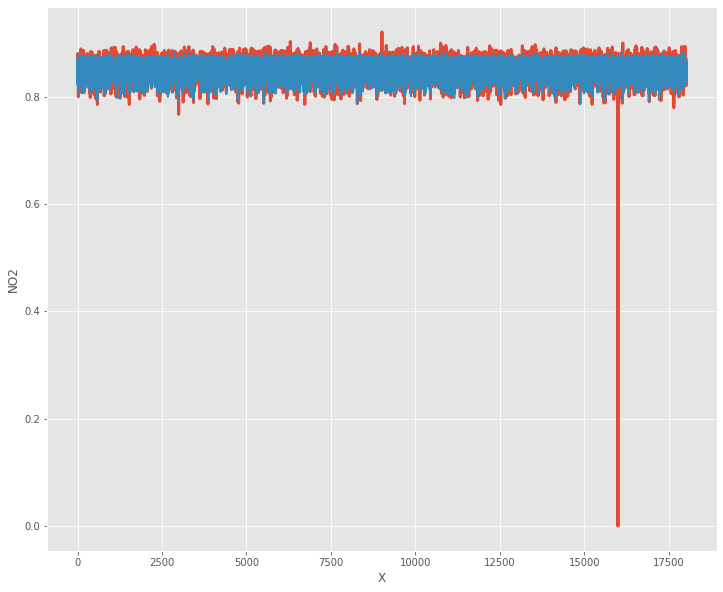

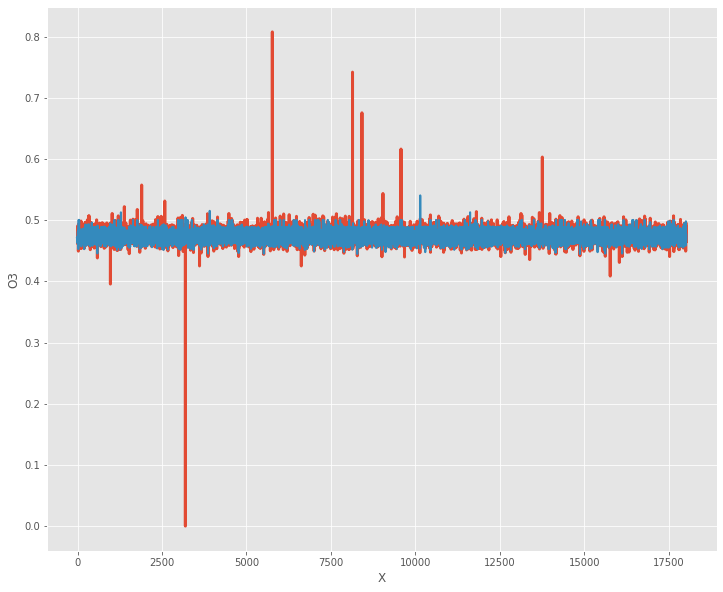

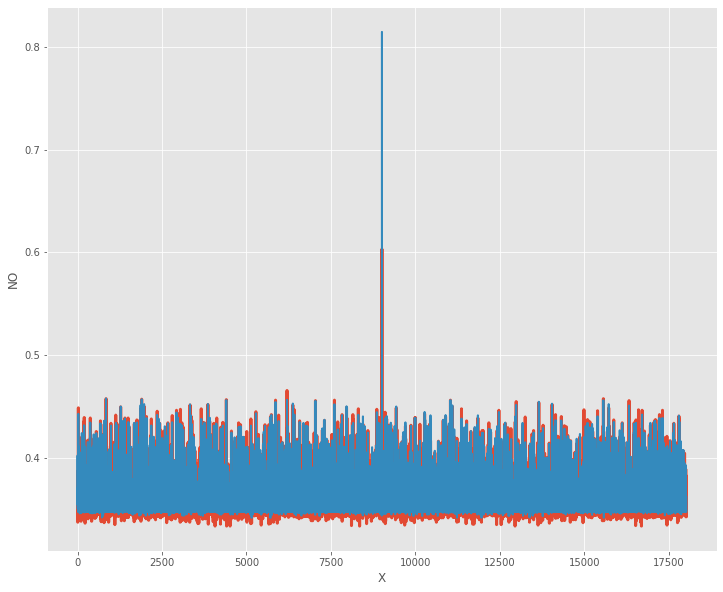

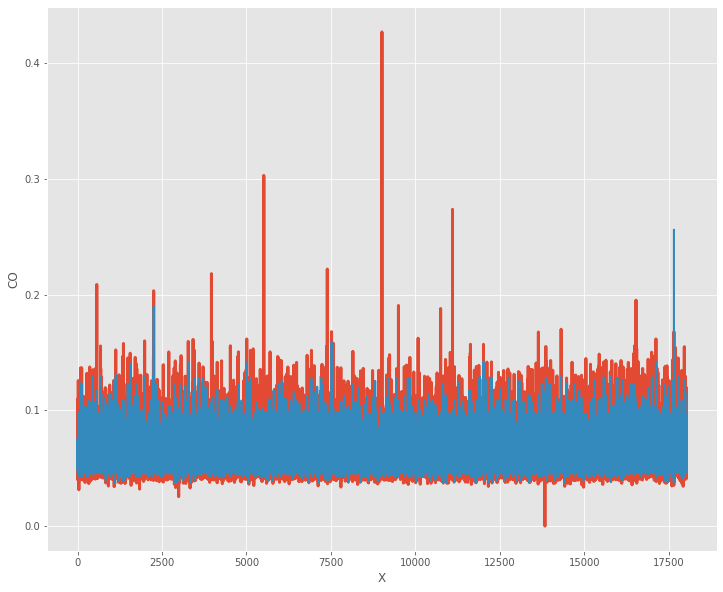

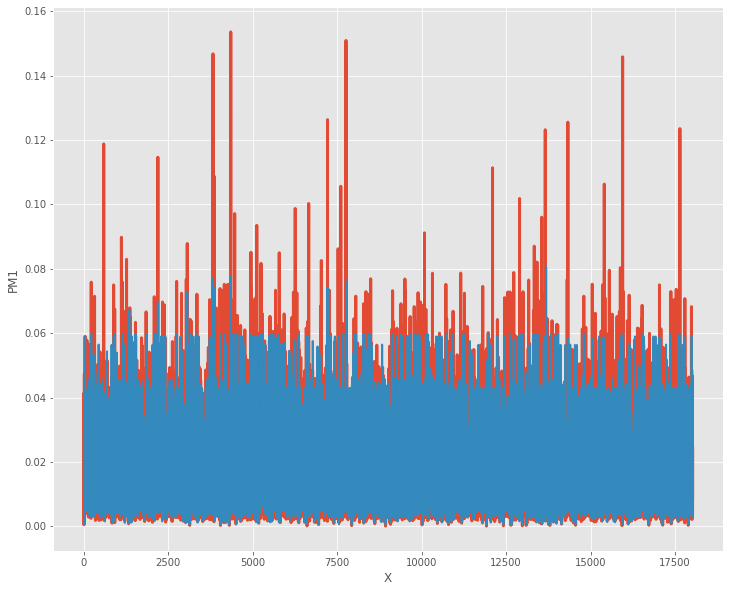

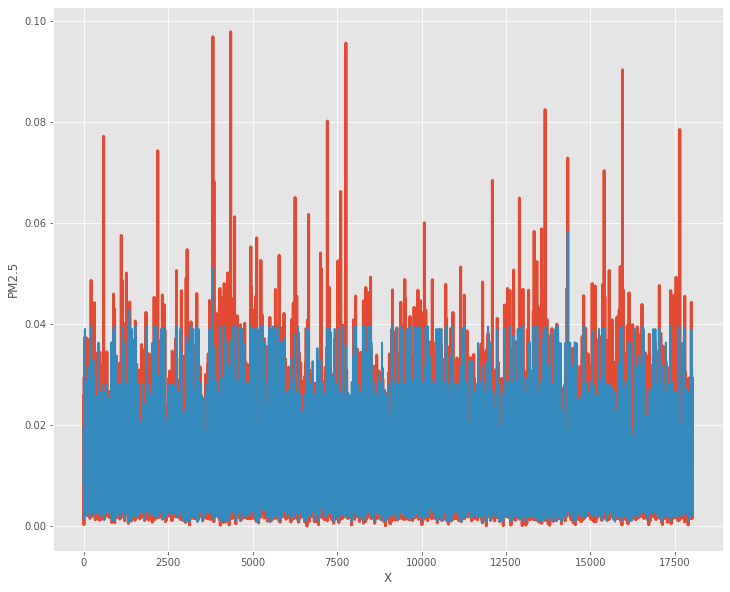

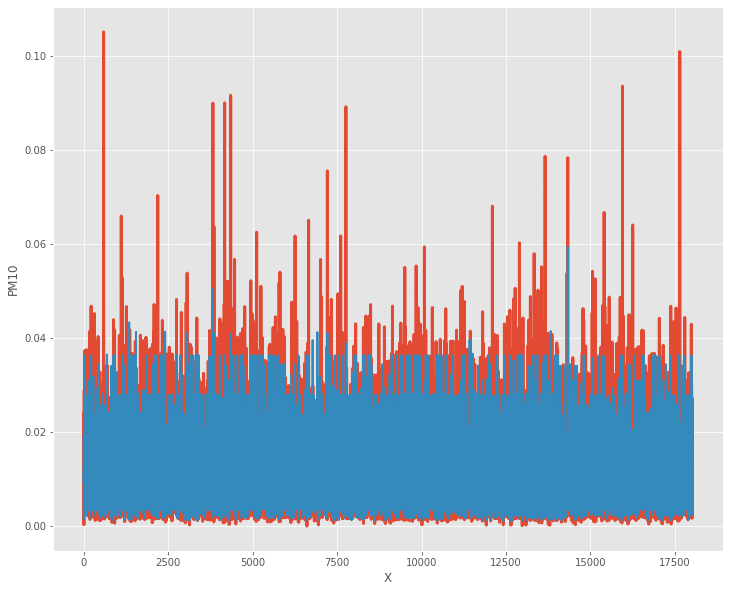

In [35]:
train_sizes=['NO2','O3','NO','CO','PM1','PM2.5','PM10']
#finding out the r2 score
y_train_pred2=model2.predict(x_train)
r2_train2=r2_score(y_train,y_train_pred2)

y_test_pred2=model2.predict(x_test)
r2_test2=r2_score(y_test,y_test_pred2)

print('r2 score on train data '+str(r2_train2))
print('r2 score on test data '+ str(r2_test2))

# printing y_test and y_test_predict
print("Y_Test:",y_test)
print("Y_Test_Predict:",y_test_pred2)

from matplotlib import style

style.use('ggplot')
for i in range(0,7):
  plt.figure(figsize=[12,10])
  plt.plot(y_test[:,i],linewidth=3, markersize=12)
  plt.plot(y_test_pred2[:,i],linewidth=2, markersize=12)
  plt.xlabel('X')
  plt.ylabel(train_sizes[i])
  plt.show()


MSE,MAE and RMSE Values of Random Forest Algorithm

In [36]:
from sklearn import metrics
rf_mae=metrics.mean_absolute_error(y_test, y_test_pred2)
rf_mse=metrics.mean_squared_error(y_test, y_test_pred2)
rf_rmse=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred2))
print('Mean Absolute Error:',rf_mae)
print('Mean Squared Error:',rf_mse )
print('Root Mean Squared Error:',rf_rmse)

Mean Absolute Error: 0.004007709673082403
Mean Squared Error: 5.510128809819064e-05
Root Mean Squared Error: 0.007423024188172274


##Vector Auto Regression Model (VAR)

**Plotting Graphs of all values**

[150. 150. 150. ... 149. 149. 149.]


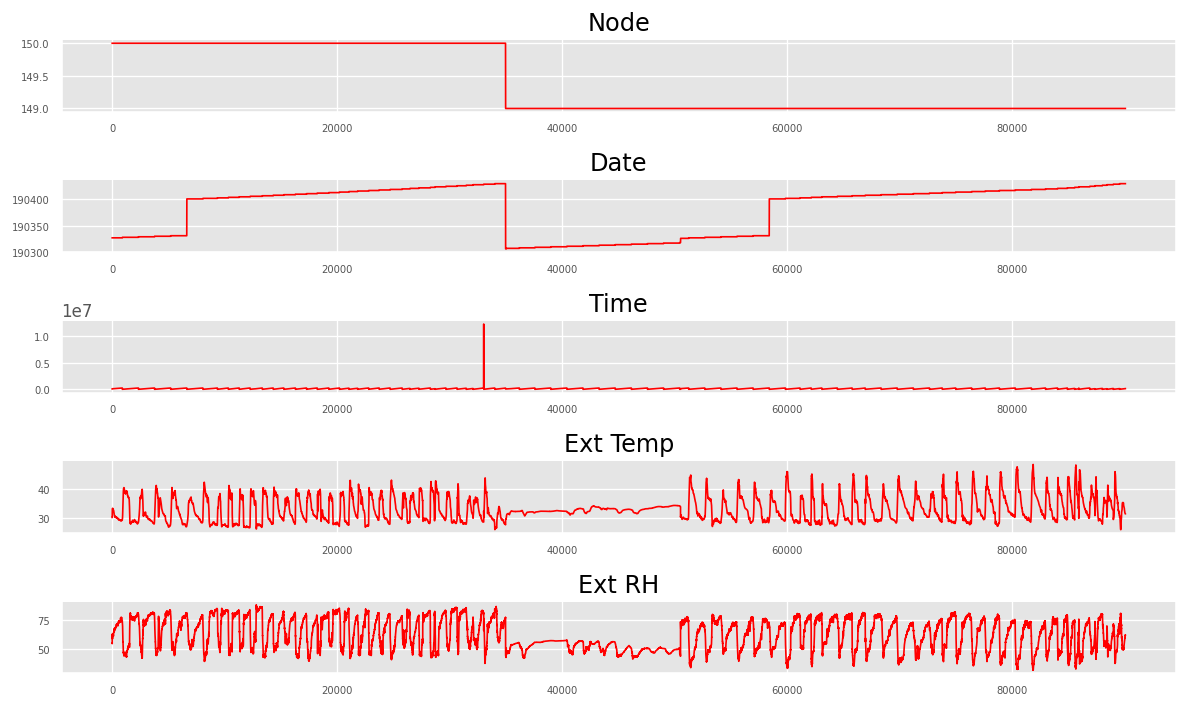

In [35]:
data=A1[:,0]
name=["Node","Date","Time","Ext Temp","Ext RH"]
print(data)
fig,axes =plt.subplots(nrows=5,ncols=1,dpi=120,figsize=(10,6))
for i,ax in enumerate(axes.flatten()):
  data=A1[:,i]
  ax.plot(data,color='red',linewidth=1)
  ax.set_title(name[i])
  ax.xaxis.set_ticks_position('none')
  ax.yaxis.set_ticks_position('none')
  ax.spines["top"].set_alpha(0)
  ax.tick_params(labelsize=6)

plt.tight_layout();


[ 16.  12. 123. ...  55.  58.  59.]


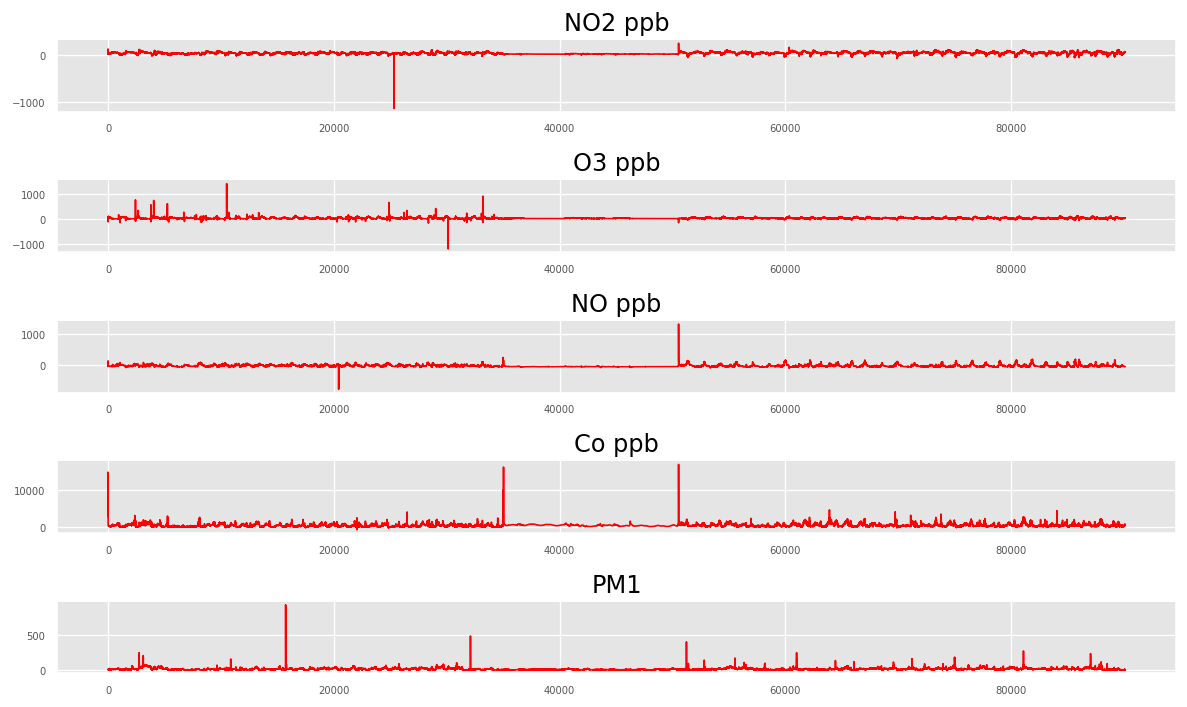

In [36]:

data=U1[:,0]
name=["NO2 ppb","O3 ppb","NO ppb","Co ppb","PM1","PM 2.5","PM 10"]
print(data)
fig,axes =plt.subplots(nrows=5,ncols=1,dpi=120,figsize=(10,6))
for i,ax in enumerate(axes.flatten()):
  data=U1[:,i]

  ax.plot(data,color='red',linewidth=1)
  ax.set_title(name[i])
  ax.xaxis.set_ticks_position('none')
  ax.yaxis.set_ticks_position('none')
  ax.spines["top"].set_alpha(0)
  ax.tick_params(labelsize=6)

plt.tight_layout();


**Augmented Dickey–Fuller test for checking stationarity**

if p value is less then 0.50 it means it is in stationary 

In [37]:
# print(A1[0:,2])
from statsmodels.tsa.stattools import adfuller
for i in range(0,7):
  ad_fuller_result_1=adfuller(U1[:,i])
  print('realgdp')
  print(f'ADF Statistic: {ad_fuller_result_1[0]}')
  if ad_fuller_result_1[1]<0.05:
    print('Stationary Series')
  else:
    print('Non-Stationary Series')
  print(f'p-value: {ad_fuller_result_1[1]}')

  print('\n----------------------------\n')



realgdp
ADF Statistic: -15.35823250067174
Stationary Series
p-value: 3.642172873126595e-28

----------------------------

realgdp
ADF Statistic: -13.09571867605829
Stationary Series
p-value: 1.7510754864781613e-24

----------------------------

realgdp
ADF Statistic: -14.660180486365105
Stationary Series
p-value: 3.3912162009569796e-27

----------------------------

realgdp
ADF Statistic: -16.76875756186765
Stationary Series
p-value: 1.292128183049267e-29

----------------------------

realgdp
ADF Statistic: -11.96433116021143
Stationary Series
p-value: 4.033463221950206e-22

----------------------------

realgdp
ADF Statistic: -12.137227990612617
Stationary Series
p-value: 1.6826473423673307e-22

----------------------------

realgdp
ADF Statistic: -12.305888533615473
Stationary Series
p-value: 7.273313097068952e-23

----------------------------



In [38]:
from sklearn.preprocessing import MinMaxScaler
import warnings
scaler_obj=MinMaxScaler()
X1=scaler_obj.fit_transform(A1)
Y1=scaler_obj.fit_transform(U1)

warnings.filterwarnings(action='ignore', category=UserWarning)

# Splitting Data into training and testing dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.2,random_state=42)

from statsmodels.tsa.statespace.varmax import VARMAX

model3=VARMAX(exog=x_train,endog=y_train,order=(1,0))

#training the model
model_fit3=model3.fit(disp=False)
print("Model training is Done!!")

Model training is Done!!


In [39]:
from sklearn import metrics
var_aic=model_fit3.aic
print("AIC Value for VAR Model:",var_aic)
var_bic=model_fit3.bic
print("BIC Value for VAR Model:",var_bic)
y_test_pred3=model_fit3.forecast(exog=x_test,steps=len(x_test))

var_mae=metrics.mean_absolute_error(y_test, y_test_pred3)
var_mse=metrics.mean_squared_error(y_test, y_test_pred3)
var_rmse=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred3))
print('Mean Absolute Error:',var_mae)
print('Mean Squared Error:',var_mse )
print('Root Mean Squared Error:',var_rmse)




AIC Value for VAR Model: -3623002.3803782263
BIC Value for VAR Model: -3621909.3004321125
Mean Absolute Error: 0.007302538086412762
Mean Squared Error: 0.00012164231497931546
Root Mean Squared Error: 0.011029157491817562


r2 score on test data 0.3600870655999348
Y_Test: [[0.83321352 0.47020377 0.36282353 ... 0.00947242 0.00604374 0.00577713]
 [0.84399712 0.4698193  0.38682353 ... 0.01225085 0.00741732 0.01820147]
 [0.8612509  0.46212995 0.35905882 ... 0.02480208 0.01547175 0.01487246]
 ...
 [0.85621855 0.47289504 0.36611765 ... 0.00364736 0.00230878 0.0022914 ]
 [0.86268871 0.46597463 0.368      ... 0.02466262 0.01609132 0.01656939]
 [0.83393242 0.4709727  0.34305882 ... 0.00878586 0.00534819 0.00692823]]
Y_Test_Predict: [[0.84454191 0.47391011 0.36876555 ... 0.01488849 0.00953531 0.01022517]
 [0.83526275 0.47530266 0.38637578 ... 0.01253591 0.00766406 0.00871153]
 [0.85871225 0.46898695 0.35695884 ... 0.02366829 0.01515428 0.01590251]
 ...
 [0.83902116 0.47654048 0.36735623 ... 0.00975819 0.00626788 0.00696239]
 [0.86460062 0.4650226  0.35289805 ... 0.02519868 0.01586015 0.01685888]
 [0.83673343 0.47055984 0.34933673 ... 0.00540468 0.00323    0.00353922]]


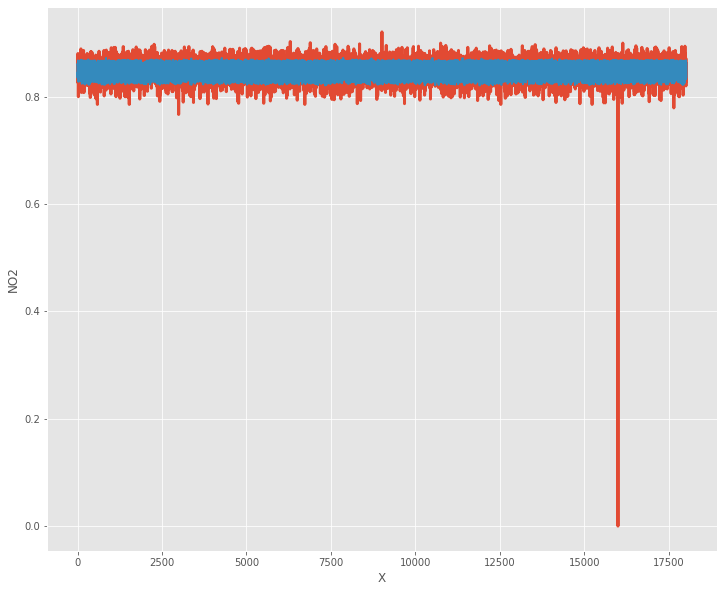

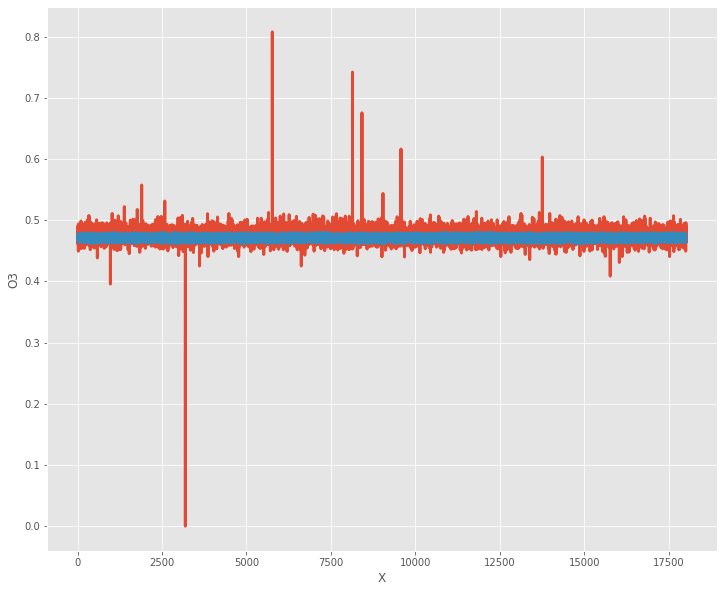

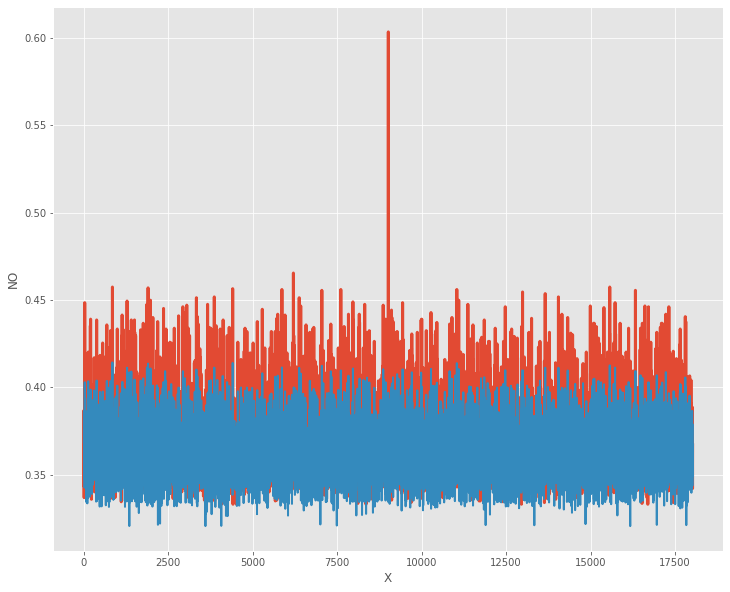

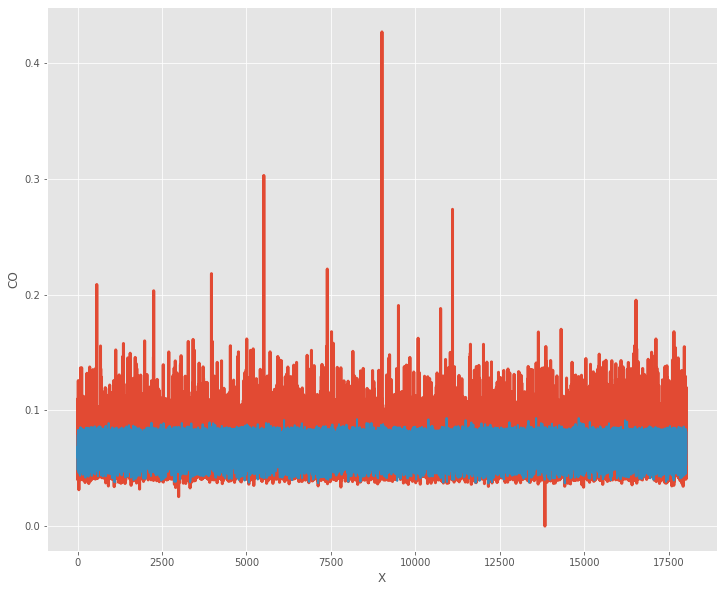

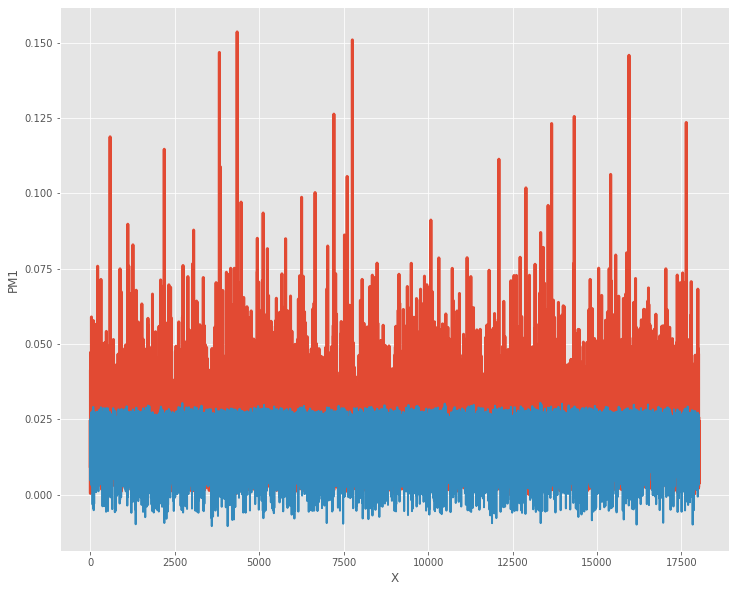

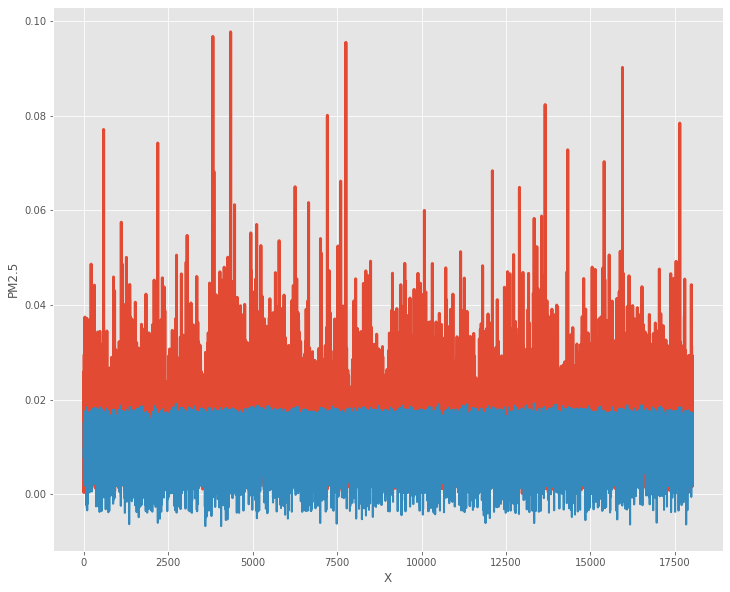

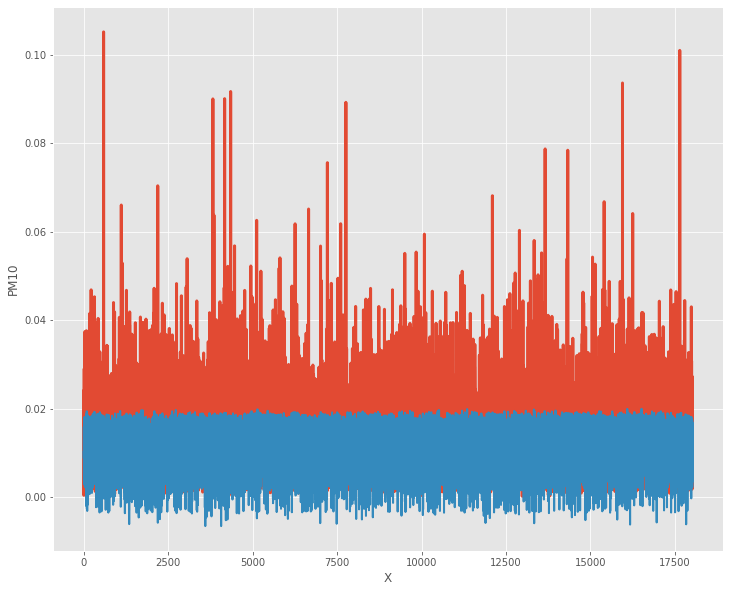

In [40]:
#finding out the r2 score

r2_test3=r2_score(y_test,y_test_pred3)

print('r2 score on test data '+ str(r2_test3))

# printing y_test and y_test_predict
print("Y_Test:",y_test)
print("Y_Test_Predict:",y_test_pred3)

from matplotlib import style

style.use('ggplot')

for i in range(0,7):
  plt.figure(figsize=[12,10])
  plt.plot(y_test[:,i],linewidth=3, markersize=12)
  plt.plot(y_test_pred3[:,i],linewidth=2, markersize=12)
  plt.xlabel('X')
  plt.ylabel(train_sizes[i])
  plt.show()



##Vector Moving Average (VMA Model)

In [5]:
from sklearn.preprocessing import MinMaxScaler
import warnings
scaler_obj=MinMaxScaler()
X1=scaler_obj.fit_transform(A1)
Y1=scaler_obj.fit_transform(U1)

warnings.filterwarnings(action='ignore', category=UserWarning)

# Splitting Data into training and testing dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.2,random_state=42)

from statsmodels.tsa.statespace.varmax import VARMAX

model4=VARMAX(exog=x_train,endog=y_train,order=(0,1))

#training the model
model_fit4=model4.fit(disp=False)
print("Model training is Done!!")

Model training is Done!!


In [8]:
from sklearn import metrics
vma_aic=model_fit4.aic
print("AIC Value for VMA Model:",vma_aic)
vma_bic=model_fit4.bic
print("BIC Value for VMA Model:",vma_bic)
y_test_pred4=model_fit4.forecast(exog=x_test,steps=len(x_test))

vma_mae=metrics.mean_absolute_error(y_test, y_test_pred4)
vma_mse=metrics.mean_squared_error(y_test, y_test_pred4)
vma_rmse=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred4))
print('Mean Absolute Error:',vma_mae)
print('Mean Squared Error:',vma_mse )
print('Root Mean Squared Error:',vma_rmse)


AIC Value for VMA Model: -3623029.066632705
BIC Value for VMA Model: -3621935.986686591
Mean Absolute Error: 0.007300713574989763
Mean Squared Error: 0.00012161140493576916
Root Mean Squared Error: 0.011027756115174526


r2 score on test data 0.36034097852264296
Y_Test: [[0.83321352 0.47020377 0.36282353 ... 0.00947242 0.00604374 0.00577713]
 [0.84399712 0.4698193  0.38682353 ... 0.01225085 0.00741732 0.01820147]
 [0.8612509  0.46212995 0.35905882 ... 0.02480208 0.01547175 0.01487246]
 ...
 [0.85621855 0.47289504 0.36611765 ... 0.00364736 0.00230878 0.0022914 ]
 [0.86268871 0.46597463 0.368      ... 0.02466262 0.01609132 0.01656939]
 [0.83393242 0.4709727  0.34305882 ... 0.00878586 0.00534819 0.00692823]]
Y_Test_Predict: [[0.84452241 0.47396675 0.36881414 ... 0.0149933  0.0096086  0.01031514]
 [0.83517673 0.47532058 0.38640225 ... 0.01263855 0.00773345 0.00880418]
 [0.85891988 0.46896547 0.35683205 ... 0.02340429 0.01497344 0.01566229]
 ...
 [0.83892244 0.47652861 0.36737904 ... 0.00979224 0.00628597 0.00699612]
 [0.86486387 0.46502343 0.3526707  ... 0.02486749 0.01563149 0.01656701]
 [0.83658739 0.47056833 0.34953837 ... 0.00567395 0.00342302 0.00377931]]


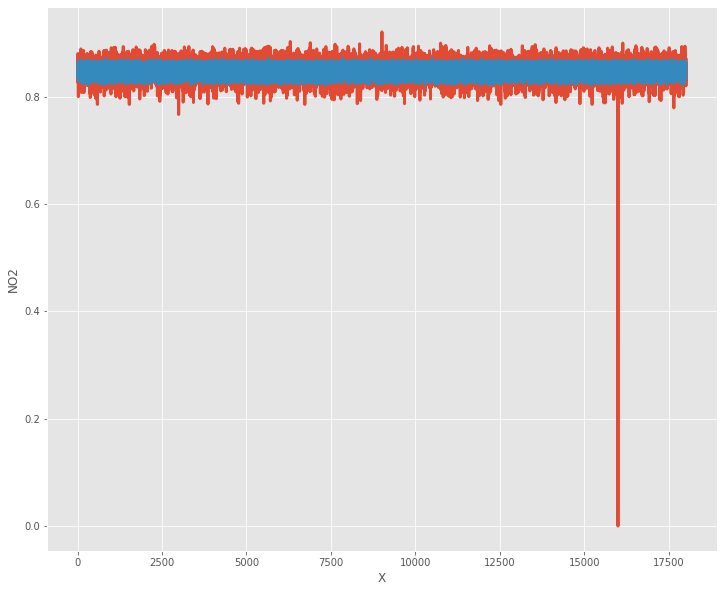

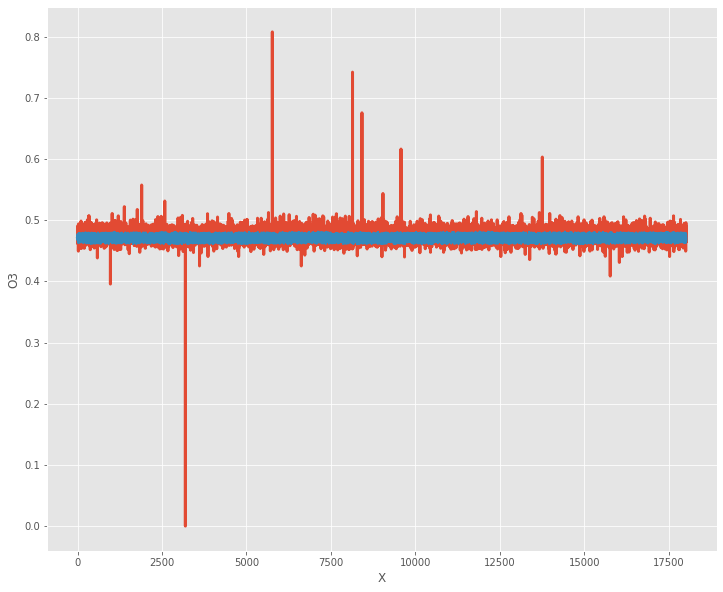

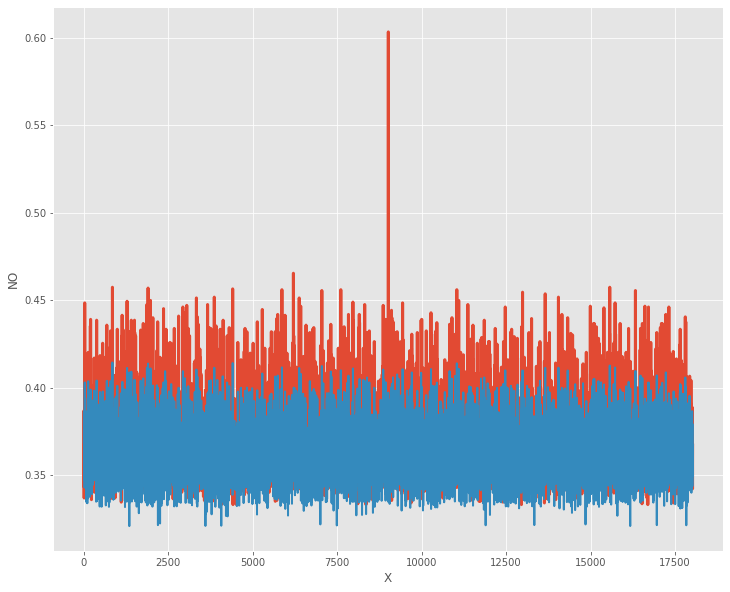

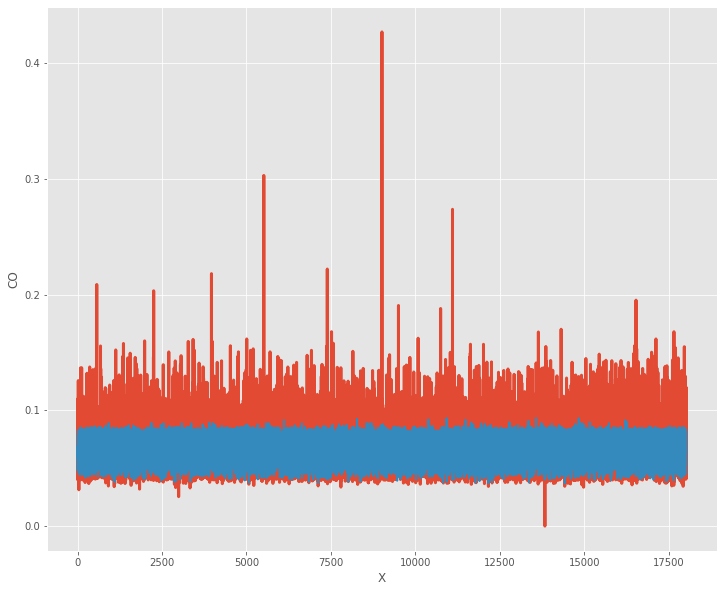

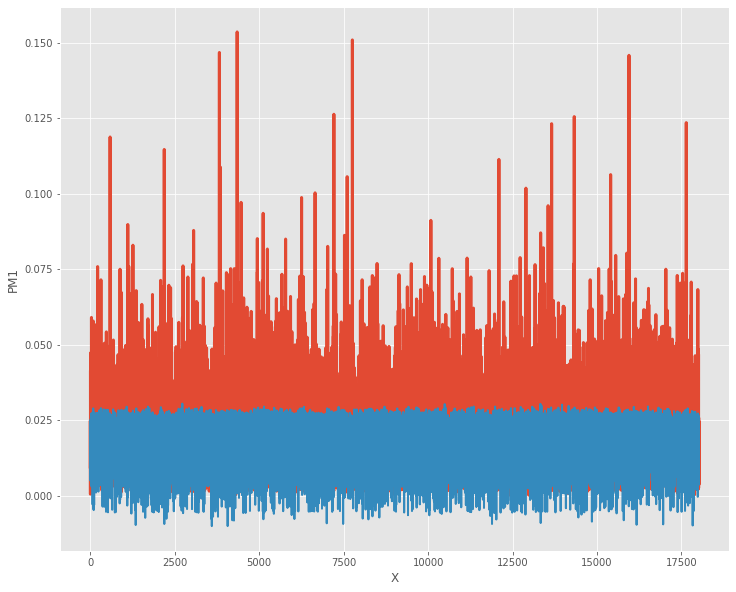

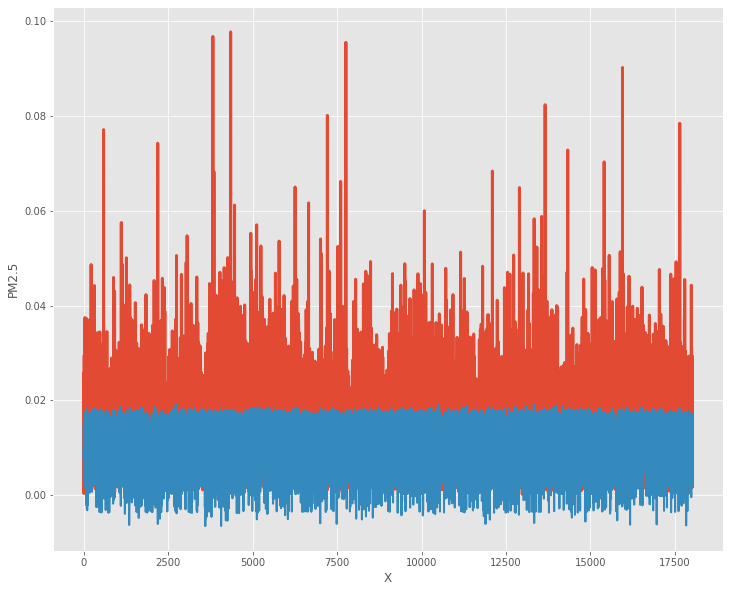

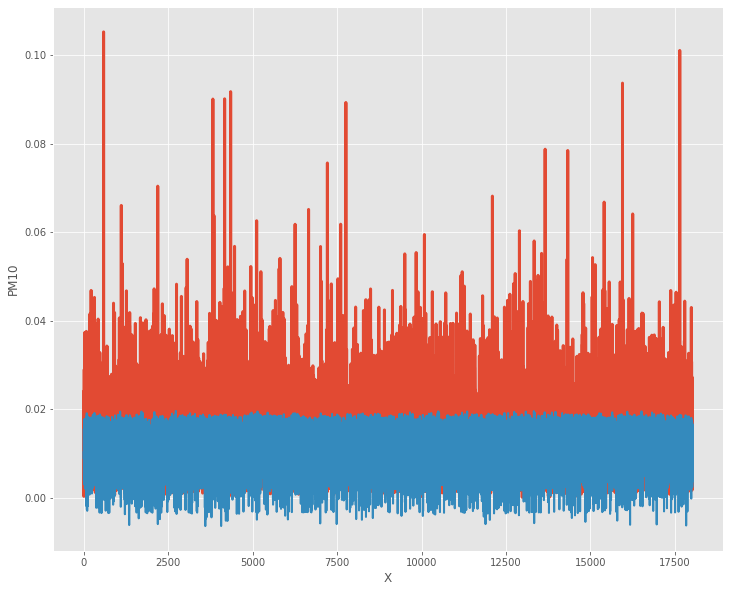

In [11]:
#finding out the r2 score
from sklearn.metrics import r2_score

train_sizes=['NO2','O3','NO','CO','PM1','PM2.5','PM10']

r2_test4=r2_score(y_test,y_test_pred4)

print('r2 score on test data '+ str(r2_test4))

# printing y_test and y_test_predict
print("Y_Test:",y_test)
print("Y_Test_Predict:",y_test_pred4)

from matplotlib import style

style.use('ggplot')
for i in range(0,7):
  plt.figure(figsize=[12,10])
  plt.plot(y_test[:,i],linewidth=3, markersize=12)
  plt.plot(y_test_pred4[:,i],linewidth=2, markersize=12)
  plt.xlabel('X')
  plt.ylabel(train_sizes[i])
  plt.show()



## Vector Auto Regressive Moving Average Model (VARMAX)

In [16]:
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.preprocessing import MinMaxScaler
import warnings
scaler_obj=MinMaxScaler()
X1=scaler_obj.fit_transform(A1)
Y1=scaler_obj.fit_transform(U1)

warnings.filterwarnings(action='ignore', category=UserWarning)

# Splitting Data into training and testing dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.2,random_state=42)

model5=VARMAX(exog=x_train,endog=y_train,order=(1,1))

#training the model
model_fit5=model5.fit(disp=False)
print("Model training is Done!!")

Model training is Done!!


In [19]:
from sklearn import metrics
varmax_aic=model_fit5.aic
print("AIC Value for VARMAX Model:",varmax_aic)
varmax_bic=model_fit5.bic
print("BIC Value for VARMAX Model:",varmax_bic)
print(y_test)
y_test_pred5=model_fit5.forecast(exog=x_test,steps=len(x_test))
print(y_test_pred5)

varmax_mae=metrics.mean_absolute_error(y_test, y_test_pred5)
varmax_mse=metrics.mean_squared_error(y_test, y_test_pred5)
varmax_rmse=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred5))
print('Mean Absolute Error:',varmax_mae)
print('Mean Squared Error:',varmax_mse )
print('Root Mean Squared Error:',varmax_rmse)

AIC Value for VARMAX Model: -3622904.383916931
BIC Value for VARMAX Model: -3621361.2122283005
[[0.83321352 0.47020377 0.36282353 ... 0.00947242 0.00604374 0.00577713]
 [0.84399712 0.4698193  0.38682353 ... 0.01225085 0.00741732 0.01820147]
 [0.8612509  0.46212995 0.35905882 ... 0.02480208 0.01547175 0.01487246]
 ...
 [0.85621855 0.47289504 0.36611765 ... 0.00364736 0.00230878 0.0022914 ]
 [0.86268871 0.46597463 0.368      ... 0.02466262 0.01609132 0.01656939]
 [0.83393242 0.4709727  0.34305882 ... 0.00878586 0.00534819 0.00692823]]
[[0.84454354 0.47390895 0.36876583 ... 0.01489024 0.00953651 0.01022582]
 [0.83526278 0.47530264 0.38637577 ... 0.01253591 0.00766405 0.00871152]
 [0.85871226 0.46898694 0.35695885 ... 0.02366831 0.01515429 0.01590252]
 ...
 [0.83902116 0.47654047 0.36735624 ... 0.00975821 0.00626789 0.0069624 ]
 [0.86460063 0.46502259 0.35289805 ... 0.0251987  0.01586016 0.01685889]
 [0.83673343 0.47055983 0.34933674 ... 0.0054047  0.00323001 0.00353923]]
Mean Absolute Err

r2 score on test data 0.36008704455714285
Y_Test: [[0.83321352 0.47020377 0.36282353 ... 0.00947242 0.00604374 0.00577713]
 [0.84399712 0.4698193  0.38682353 ... 0.01225085 0.00741732 0.01820147]
 [0.8612509  0.46212995 0.35905882 ... 0.02480208 0.01547175 0.01487246]
 ...
 [0.85621855 0.47289504 0.36611765 ... 0.00364736 0.00230878 0.0022914 ]
 [0.86268871 0.46597463 0.368      ... 0.02466262 0.01609132 0.01656939]
 [0.83393242 0.4709727  0.34305882 ... 0.00878586 0.00534819 0.00692823]]
Y_Test_Predict: [[0.84454354 0.47390895 0.36876583 ... 0.01489024 0.00953651 0.01022582]
 [0.83526278 0.47530264 0.38637577 ... 0.01253591 0.00766405 0.00871152]
 [0.85871226 0.46898694 0.35695885 ... 0.02366831 0.01515429 0.01590252]
 ...
 [0.83902116 0.47654047 0.36735624 ... 0.00975821 0.00626789 0.0069624 ]
 [0.86460063 0.46502259 0.35289805 ... 0.0251987  0.01586016 0.01685889]
 [0.83673343 0.47055983 0.34933674 ... 0.0054047  0.00323001 0.00353923]]


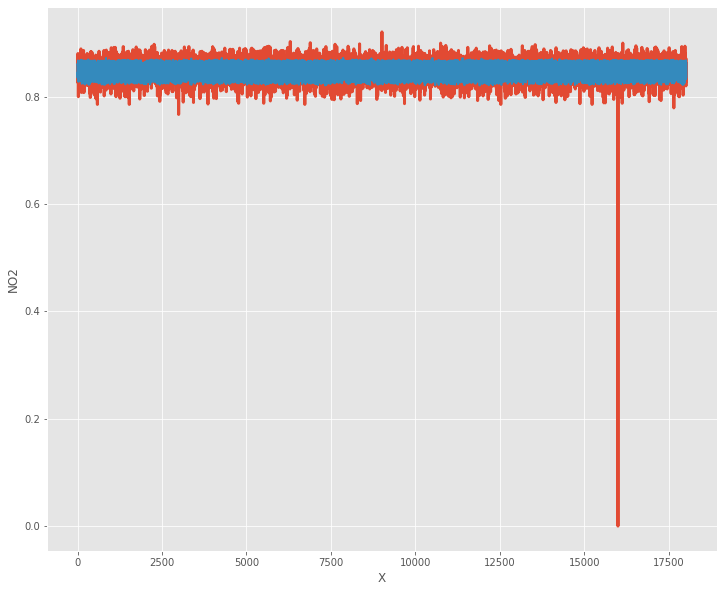

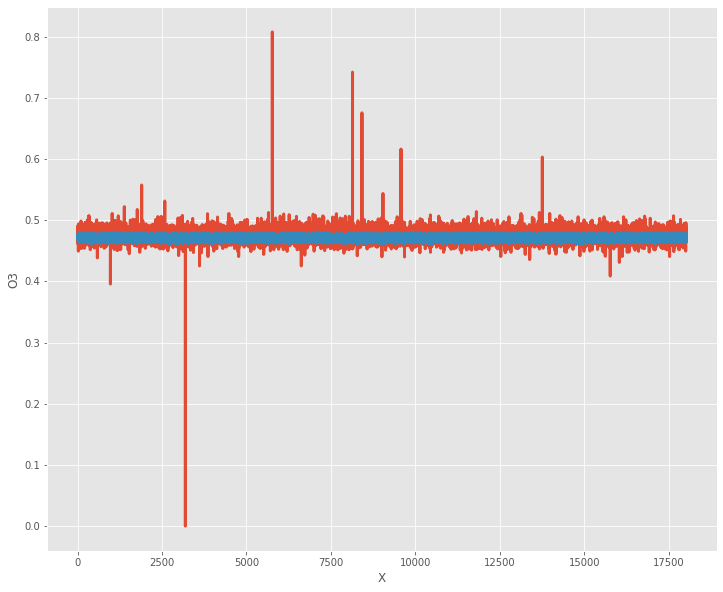

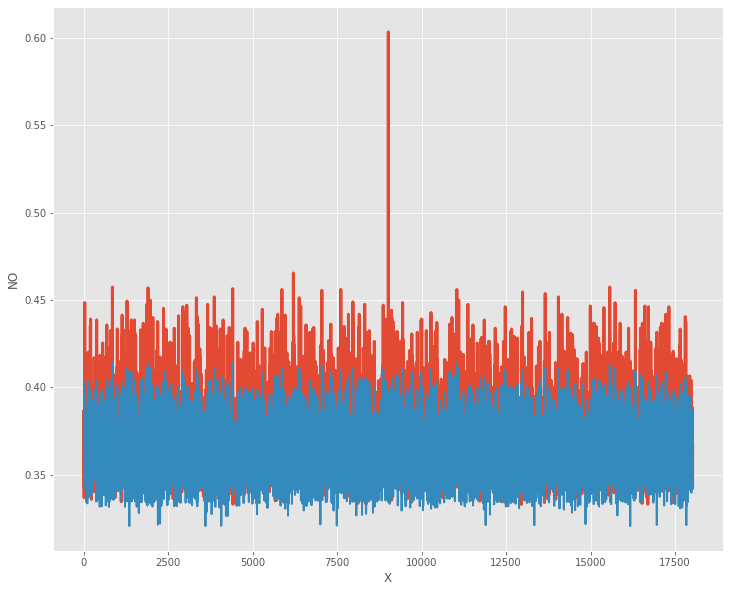

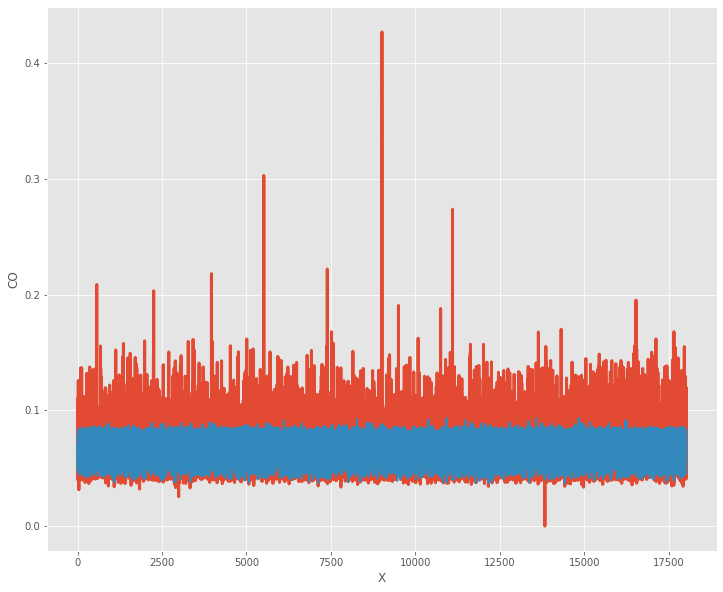

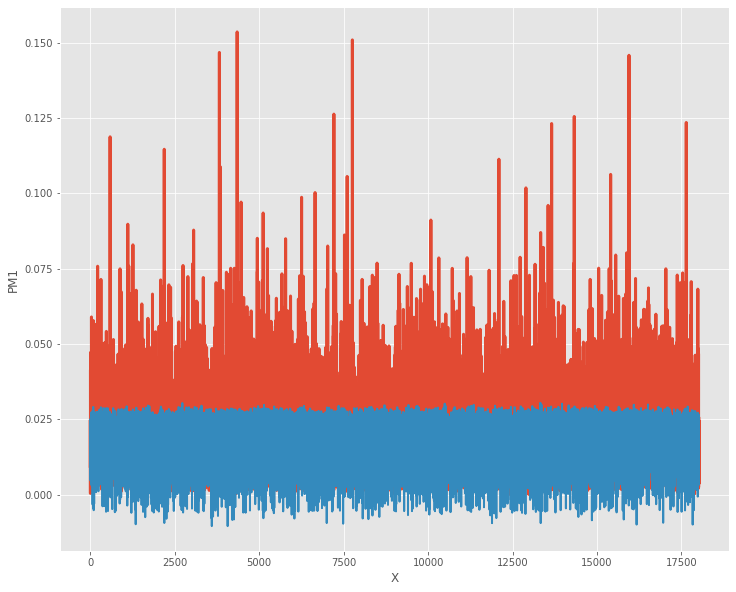

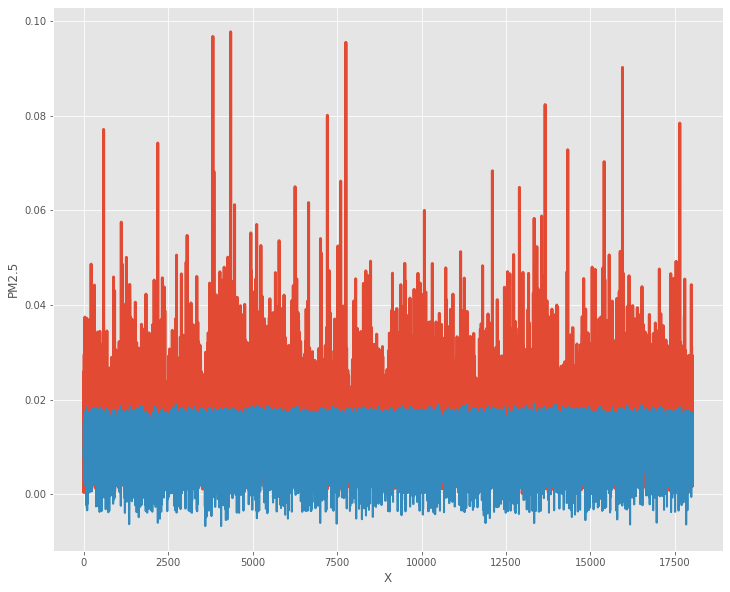

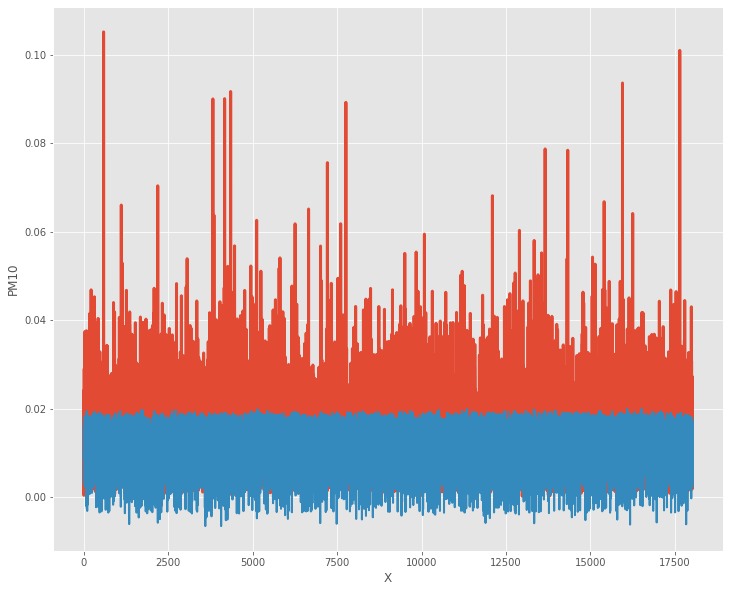

In [18]:
#finding out the r2 score
from sklearn.metrics import r2_score

train_sizes=['NO2','O3','NO','CO','PM1','PM2.5','PM10']
r2_test5=r2_score(y_test,y_test_pred5)

print('r2 score on test data '+ str(r2_test5))

# printing y_test and y_test_predict
print("Y_Test:",y_test)
print("Y_Test_Predict:",y_test_pred5)

from matplotlib import style

style.use('ggplot')

for i in range(0,7):
  plt.figure(figsize=[12,10])
  plt.plot(y_test[:,i],linewidth=3, markersize=12)
  plt.plot(y_test_pred5[:,i],linewidth=2, markersize=12)
  plt.xlabel('X')
  plt.ylabel(train_sizes[i])
  plt.show()


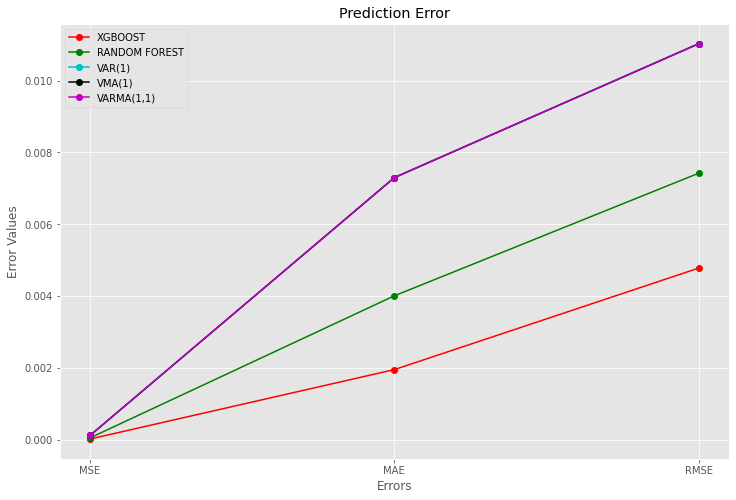

In [25]:
train_sizes=['MSE','MAE','RMSE','AIC','BIC']
xgboost_list=[0.00002285973898022485,0.001955862053424563,0.00478118593867932]
randomforest_list=[0.00005511369987097619,0.0040103400631165955,0.007423860173183233]
var_list=[0.00012164231497931546,0.007302538086412745,0.011029157491817562,-3623002.3803782254,-3621909.3004321116]
vma_list=[0.00012161140493576916,0.007300713574989763,0.011027756115174526,-3623029.066632705,-3621935.986686591]
varmax_list=[0.00012164231712440681,0.007302540667162326,0.011029157589063945,-3622904.383916931,-3621361.2122283005]

plt.figure(figsize=[12,8])

plt.plot(train_sizes[:-2],xgboost_list, 'o-', color="r", label="XGBOOST")
plt.plot(train_sizes[:-2],randomforest_list, 'o-', color="g", label="RANDOM FOREST")
plt.plot(train_sizes[:-2],var_list[:-2], 'o-', color="c", label="VAR(1)")
plt.plot(train_sizes[:-2],vma_list[:-2], 'o-', color="k", label="VMA(1)")
plt.plot(train_sizes[:-2],varmax_list[:-2], 'o-',color="m",label="VARMA(1,1)")

plt.xlabel("Errors")
plt.ylabel("Error Values")
plt.title('Prediction Error')
plt.legend(loc='best')
plt.show()

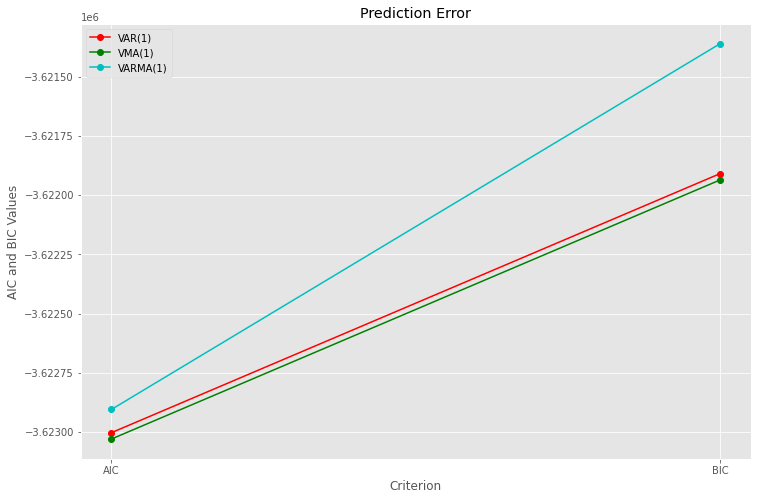

In [24]:
plt.figure(figsize=[12,8])

plt.plot(train_sizes[3:],var_list[3:], 'o-', color="r", label="VAR(1)")
plt.plot(train_sizes[3:],vma_list[3:], 'o-', color="g", label="VMA(1)")
plt.plot(train_sizes[3:],varmax_list[3:], 'o-', color="c", label="VARMA(1)")
plt.xlabel("Criterion")
plt.ylabel("AIC and BIC Values")
plt.title('Prediction Error')
plt.legend(loc='best')
plt.show()

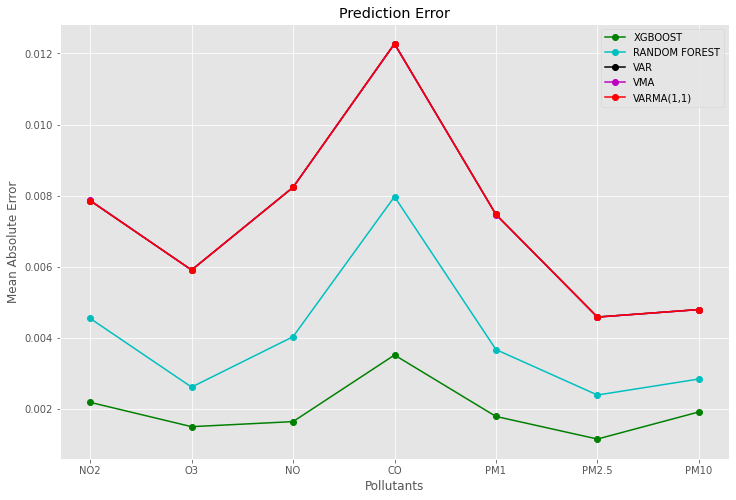

In [42]:
train_sizes=['NO2','O3','NO','CO','PM1','PM2.5','PM10']

plt.figure(figsize=[12,8])
ma1=[]
ma2=[]
ma3=[]
ma4=[]
ma5=[]
ma6=[]
ma7=[]

for i in range(0,7):
  ma1.append(metrics.mean_absolute_error(y_test[:,i:i+1], y_test_pred1[:,i:i+1]))
  ma2.append(metrics.mean_absolute_error(y_test[:,i:i+1], y_test_pred2[:,i:i+1]))
  ma3.append(metrics.mean_absolute_error(y_test[:,i:i+1], y_test_pred3[:,i:i+1]))
  ma4.append(metrics.mean_absolute_error(y_test[:,i:i+1], y_test_pred4[:,i:i+1]))
  ma5.append(metrics.mean_absolute_error(y_test[:,i:i+1], y_test_pred5[:,i:i+1]))



plt.plot(train_sizes, ma1, 'o-', color="g", label="XGBOOST")
plt.plot(train_sizes, ma2, 'o-', color="c", label="RANDOM FOREST")
plt.plot(train_sizes, ma3, 'o-', color="k", label="VAR")
plt.plot(train_sizes, ma4, 'o-', color="m", label="VMA")
plt.plot(train_sizes, ma5, 'o-', color="r", label="VARMA(1,1)")

plt.xlabel("Pollutants")
plt.ylabel("Mean Absolute Error")
plt.title('Prediction Error')
plt.legend(loc="best")

plt.show()


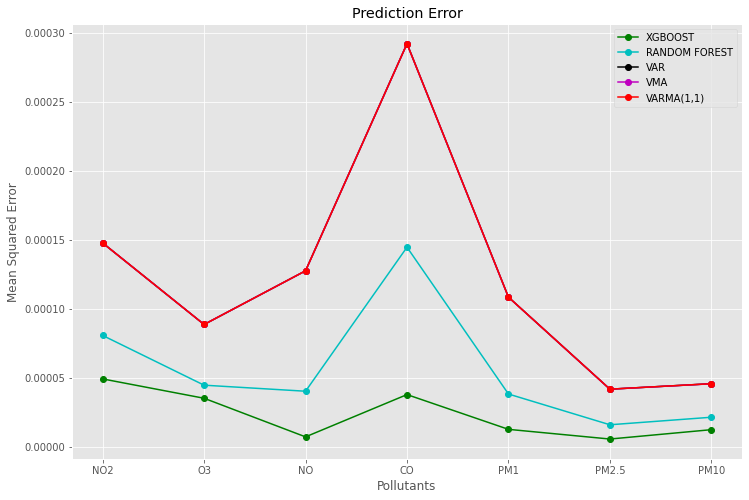

In [43]:
train_sizes=['NO2','O3','NO','CO','PM1','PM2.5','PM10']

plt.figure(figsize=[12,8])
ma1=[]
ma2=[]
ma3=[]
ma4=[]
ma5=[]
ma6=[]
ma7=[]

for i in range(0,7):
  ma1.append(metrics.mean_squared_error(y_test[:,i:i+1], y_test_pred1[:,i:i+1]))
  ma2.append(metrics.mean_squared_error(y_test[:,i:i+1], y_test_pred2[:,i:i+1]))
  ma3.append(metrics.mean_squared_error(y_test[:,i:i+1], y_test_pred3[:,i:i+1]))
  ma4.append(metrics.mean_squared_error(y_test[:,i:i+1], y_test_pred4[:,i:i+1]))
  ma5.append(metrics.mean_squared_error(y_test[:,i:i+1], y_test_pred5[:,i:i+1]))



plt.plot(train_sizes, ma1, 'o-', color="g", label="XGBOOST")
plt.plot(train_sizes, ma2, 'o-', color="c", label="RANDOM FOREST")
plt.plot(train_sizes, ma3, 'o-', color="k", label="VAR")
plt.plot(train_sizes, ma4, 'o-', color="m", label="VMA")
plt.plot(train_sizes, ma5, 'o-', color="r", label="VARMA(1,1)")

plt.xlabel("Pollutants")
plt.ylabel("Mean Squared Error")
plt.title('Prediction Error')
plt.legend(loc="best")

plt.show()


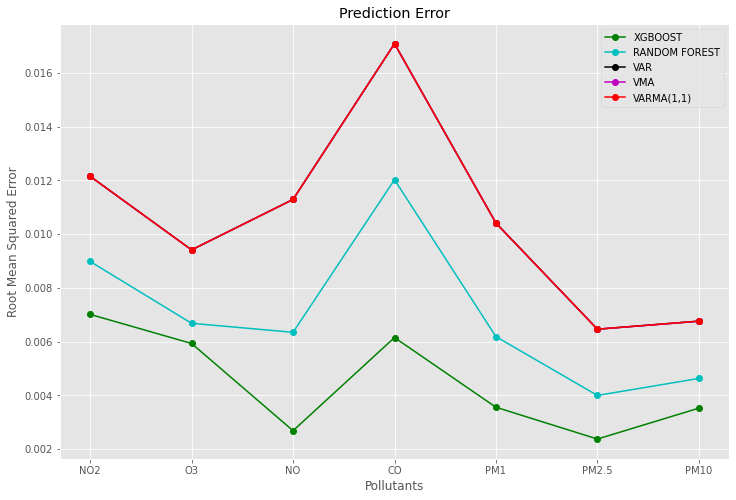

In [44]:
train_sizes=['NO2','O3','NO','CO','PM1','PM2.5','PM10']

plt.figure(figsize=[12,8])
ma1=[]
ma2=[]
ma3=[]
ma4=[]
ma5=[]
ma6=[]
ma7=[]

for i in range(0,7):
  ma1.append(np.sqrt(metrics.mean_squared_error(y_test[:,i:i+1], y_test_pred1[:,i:i+1])))
  ma2.append(np.sqrt(metrics.mean_squared_error(y_test[:,i:i+1], y_test_pred2[:,i:i+1])))
  ma3.append(np.sqrt(metrics.mean_squared_error(y_test[:,i:i+1], y_test_pred3[:,i:i+1])))
  ma4.append(np.sqrt(metrics.mean_squared_error(y_test[:,i:i+1], y_test_pred4[:,i:i+1])))
  ma5.append(np.sqrt(metrics.mean_squared_error(y_test[:,i:i+1], y_test_pred5[:,i:i+1])))


plt.plot(train_sizes, ma1, 'o-', color="g", label="XGBOOST")
plt.plot(train_sizes, ma2, 'o-', color="c", label="RANDOM FOREST")
plt.plot(train_sizes, ma3, 'o-', color="k", label="VAR")
plt.plot(train_sizes, ma4, 'o-', color="m", label="VMA")
plt.plot(train_sizes, ma5, 'o-', color="r", label="VARMA(1,1)")

plt.xlabel("Pollutants")
plt.ylabel("Root Mean Squared Error")
plt.title('Prediction Error')
plt.legend(loc="best")

plt.show()
